In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import cart

np.random.seed(seed=1)

In [2]:
hitters = pd.read_csv("data/Hitters.csv", usecols=['Years','Hits','Salary'])

In [3]:
hitters = hitters.dropna()

In [4]:
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hits    263 non-null    int64  
 1   Years   263 non-null    int64  
 2   Salary  263 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 8.2 KB


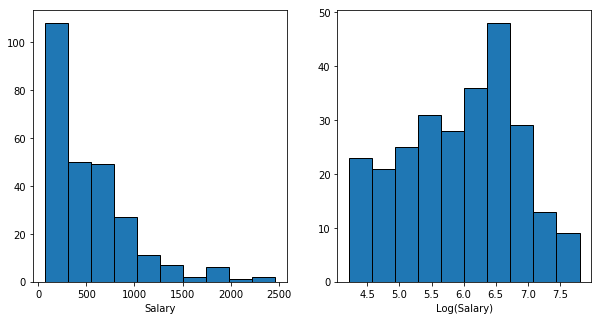

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.hist(hitters.Salary, ec='black')
ax1.set_xlabel('Salary')
ax2.hist(np.log(hitters.Salary), ec='black')
ax2.set_xlabel('Log(Salary)')
plt.show()

In [6]:
hitters['Salary'] = np.log(hitters['Salary']).round(3) ## transform salary to Salary log
training_data, test_data = train_test_split(hitters, test_size = 0.1, random_state = 42) ## split 

In [7]:
header = list(training_data.columns) ## get column headers
training_data = training_data.values.tolist() ## transform df to list of lists

In [21]:
clf = cart.CART(header,3)

In [22]:
#######
# Find the best question to ask
clf.find_best_split(training_data)[1]
#######

diameter >= 3

In [23]:
my_tree = clf.fit(training_data)

In [24]:
clf.print_tree(my_tree)

 diameter >= 3
 --> True:
   color == Yellow
   --> True:
     Predict {'Apple': '50%', 'Lemon': '50%'}
   --> False:
     Predict {'Apple': '100%'}
 --> False:
   Predict {'Grape': '100%'}


In [12]:
test_data = test_data.values.tolist()

In [13]:
## Classification with test data
for row in test_data:
    print (f"Actual: {row[-1]}. Predicted: {clf.classify(row, my_tree)}")

Actual: 6.745. Predicted: {7.529: '0%', 5.22: '0%', 6.397: '1%', 6.194: '0%', 6.802: '1%', 6.551: '1%', 5.043: '0%', 6.438: '0%', 6.263: '0%', 6.653: '1%', 6.496: '0%', 6.685: '0%', 6.839: '0%', 7.788: '0%', 5.991: '0%', 4.5: '0%', 7.57: '0%', 6.846: '0%', 4.605: '1%', 6.867: '0%', 6.62: '5%', 6.488: '0%', 7.496: '0%', 6.04: '0%', 7.17: '1%', 6.95: '0%', 7.107: '0%', 6.215: '1%', 5.858: '2%', 6.598: '0%', 5.789: '0%', 6.745: '2%', 6.328: '0%', 7.178: '0%', 7.421: '0%', 4.654: '0%', 6.916: '0%', 6.669: '0%', 7.808: '0%', 6.774: '2%', 6.028: '0%', 6.856: '1%', 6.703: '0%', 7.588: '0%', 6.31: '1%', 5.953: '0%', 6.607: '1%', 6.418: '0%', 6.363: '0%', 6.908: '2%', 7.55: '0%', 6.446: '0%', 6.949: '0%', 7.208: '0%', 6.376: '0%', 6.515: '0%', 6.189: '0%', 7.313: '0%', 7.09: '0%', 6.603: '0%', 6.659: '0%', 6.586: '0%', 7.121: '0%', 7.279: '0%', 6.163: '0%', 7.563: '0%', 6.83: '0%', 7.048: '0%', 5.617: '0%', 6.273: '0%', 6.389: '0%', 6.052: '0%', 6.282: '1%', 5.298: '0%', 5.784: '0%', 6.64: '0%'

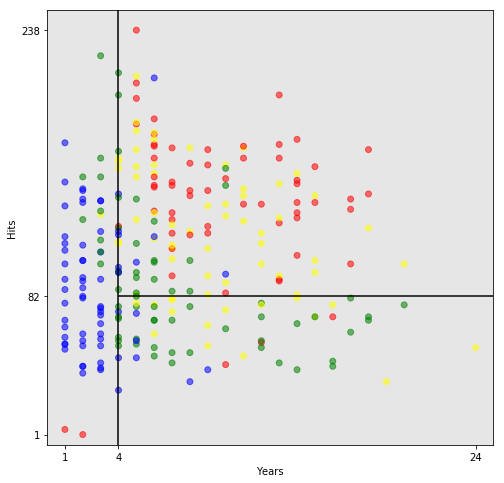

In [14]:
## plot decision boundaries
colors = ["blue","green","yellow","red"]
hitters['Salary_color'] = pd.qcut(hitters['Salary'], labels=colors, q=4)
fig,ax = plt.subplots(figsize=(8,8))
ax.set_facecolor((0.90, 0.90, 0.90))
plt.scatter(hitters.Years, hitters.Hits, c=hitters.Salary_color, alpha=.55)
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4, 24])
plt.yticks([1, 82, 238])
plt.vlines(4, ymin=-5, ymax=250)
plt.hlines(82, xmin=4, xmax=25)
plt.xlabel("Years")
plt.ylabel("Hits")
plt.show()

In [15]:
training_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]
header = ["color", "diameter", "label"]

In [16]:
clf = cart.CART(header)

In [17]:
#######
# Find the best question to ask
clf.find_best_split(training_data)[1]
#######

diameter >= 3

In [18]:
my_tree = clf.fit(training_data)

In [19]:
clf.print_tree(my_tree)

 diameter >= 3
 --> True:
   color == Yellow
   --> True:
     Predict {'Apple': '50%', 'Lemon': '50%'}
   --> False:
     Predict {'Apple': '100%'}
 --> False:
   Predict {'Grape': '100%'}


In [20]:
clf.classify(training_data[1], my_tree)

{'Apple': '50%', 'Lemon': '50%'}